## Data Science job market trend 2025

Kaggle dataset location: https://www.kaggle.com/datasets/nalisha/data-science-careers-and-salaries-2025?resource=download

I'm interested in answering the follwoing questions:
    
    which industry has the most number of data science jobs ?
    which city has the most data science jobs ?
    What are the top 3 in-demand skills ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jobdata = pd.read_csv("data/data_science_job_posts_2025.csv", sep=",")
print("data dimension", jobdata.shape)
print("type of job data ", type(jobdata))
jobdata.head(3)

data dimension (944, 13)
type of job data  <class 'pandas.core.frame.DataFrame'>


,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."


In [3]:
jobdata.columns

Index(['job_title', 'seniority_level', 'status', 'company', 'location',
       'post_date', 'headquarter', 'industry', 'ownership', 'company_size',
       'revenue', 'salary', 'skills'],
      dtype='object')

In [4]:
jobdata.dtypes

job_title          object
seniority_level    object
status             object
company            object
location           object
post_date          object
headquarter        object
industry           object
ownership          object
company_size       object
revenue            object
salary             object
skills             object
dtype: object

In [5]:
pd.set_option('display.max_columns', None)

## which industry has the most number of data science jobs ?

In [6]:
industryfreq = jobdata["industry"].value_counts()

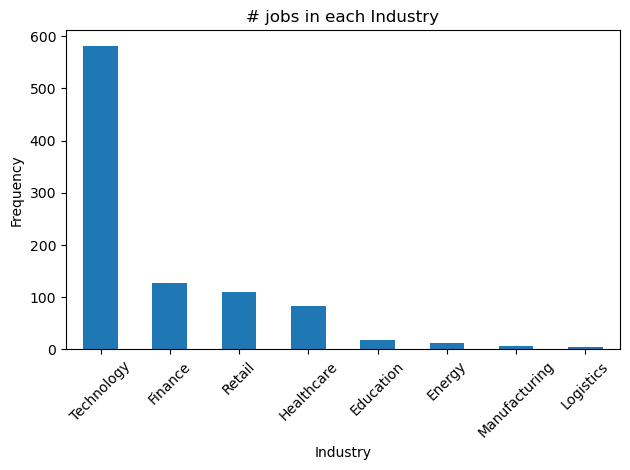

In [7]:
industryfreq.plot(kind='bar')
plt.title('# jobs in each Industry')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#jobdata.plot.hist(by="industry")
#jobdata.hist(column=["industry"])
#ax = jobdata.plot.hist(column=["industry"], figsize=(10, 8))
#jobdata.plot(column = [], title="DataFrame Plot")
#print(type(jobdata["industry"]))
#plot = jobdata["industry"].plot(kind='hist', title="My plot")


Within this dataset, we can see Technology has the most number of data science jobs in 2025 

## which city (in the United States) has the most on-site data science jobs ?

in the *location* column, entries are not in the same format. We might want to remove the rows when location = "United States", "On site", "Hybrid", "Fully Remote", becasue they don't give city information that we are 
interested in. Also note that although dataset mainly include US jobs, a fair number of jobs are located in other countries like India. 

In [8]:
# doesn't contain, df[~df['column'].str.contains('apple', case=False, na=False)]
# case=False: makes the search case-insensitive.
# na=False: treats NaN as False (so those rows aren’t dropped).
# on site jobs in the united states
# indiajobcity = jobdata[jobdata["location"].str.contains('India', case=False, na=False)]

international = ['India', 'United Kingdom', 'Singapore', 'Spain', 'Ireland', 'Canada']
international_pattern = '|'.join(international)

usjobcity = jobdata[ (jobdata["location"] != "Fully Remote") 
        & (jobdata["location"] != "United States")
        & (jobdata["location"] != "On-site") 
        & (jobdata["location"] != "Hybrid")
        & (~jobdata["location"].str.contains(international_pattern, case=False, na=False)) #remove non us jobs
        ]

In [9]:
uslocation = usjobcity["location"].value_counts().head(15)

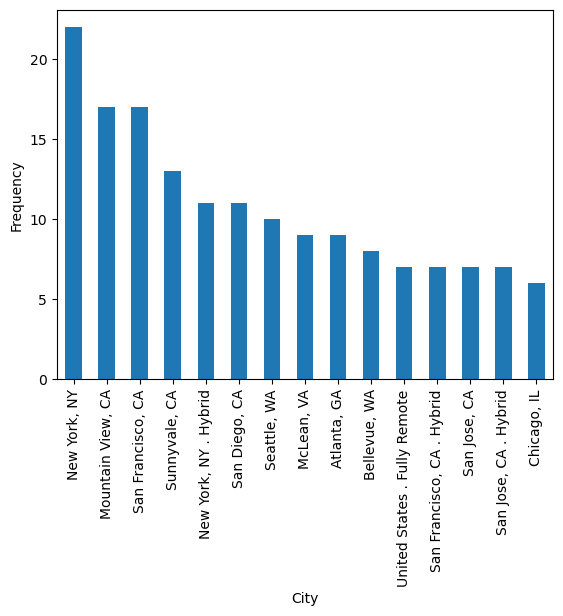

In [10]:
uslocation.plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

Observation:

Although the formatting of the location names are not ideal still, (for example, New York appears 
as multiple different entries, we can easily see that 
New York, Bay area and Seattle area have the largest number of data science jobs

## What are the top 3 in-demand skills (including all countries)?

In [11]:
jobdata["skills"].value_counts()

skills
[]                                                                      201
['sql', 'machine learning', 'r', 'python']                               40
['machine learning']                                                     31
['sql', 'r', 'python']                                                   28
['sql', 'machine learning', 'python']                                    23
                                                                       ... 
['aws', 'r', 'python', 'sql', 'machine learning']                         1
['tableau', 'r', 'python']                                                1
['scikit-learn', 'python', 'sql', 'database', 'machine learning']         1
['r', 'python', 'scala', 'sql', 'gcp']                                    1
['r', 'python', 'scala', 'sql', 'machine learning', 'deep learning']      1
Name: count, Length: 400, dtype: int64

The raw counts show large # of rows with empty "skill" entry, we want to remove them from the dataset

In [12]:
jobdata.loc[4,"skills"] == '[]'

True

From above, we can know that the data type of the skills entry is string and 
the entry is '[]' when the skill list is empty

In [7]:
# Checking the resulting dataset no longer shows rows with empty skill set
skilldata = jobdata[jobdata["skills"]!='[]']
skilldata.head(20)

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']"
5,data scientist,lead,NaN,company_013,"New York, NY",3 months ago,"New York, NY, US",Technology,Private,150,€2.16B,"€196,371 - €251,170","['scikit-learn', 'python', 'scala', 'sql', 'ma..."
7,machine learning engineer,senior,on-site,company_015,"Menlo Park, CA",9 days ago,"Menlo Park, CA, US",Technology,Public,900,Public,"€121,480 - €132,440",['machine learning']
10,data scientist,senior,NaN,company_022,"Atlanta, GA",15 days ago,"Charlotte, NC, US",Technology,Public,"103,010",€128.13B,"€96,815","['pytorch', 'r', 'python', 'sql', 'machine lea..."
11,data scientist,midlevel,NaN,company_027,Greater Vancouver Metropolitan Area,6 days ago,"Vancouver, BC, CA",Education,NaN,240,Education,"€62,697 - €89,293","['java', 'git', 'python']"
12,data scientist,senior,remote,company_029,"Minneapolis, MN . Fully Remote",8 days ago,"Golden Valley, MN, US",Manufacturing,Public,"21,030",€43.18B,"€99,464 - €165,954","['sql', 'machine learning', 'python']"
13,data scientist,senior,on-site,company_031,"Titusville, NJ . Titusville, New Jersey, Unite...",19 days ago,"New Brunswick, NJ, US",Healthcare,Public,"128,890",€413.02B,"€112,343 - €117,823","['sql', 'machine learning', 'r', 'python']"


Count the numer of occurance of each skill

In [24]:
# note that if you need to loop over the filter table, the index is no longer continuous, need to the use
# the df.index to skip over the rows that were filtered out

skill_dic = {} # to count the number of times that each skill appears

for j in skilldata.index:
    samp = skilldata.loc[j, "skills"]
    ls = samp.split("', '")
    #print(j, "length", len(ls), ls)
    # sometimes, only one skill appears in the description, the string needs to be extracted in a different way
    # compared to the case with longer skill list
    if len(ls) ==1:
        sk = ls[0][2:-2]
        #print(sk)
        skill_dic[sk] = 1 + skill_dic.get(sk,0)
    else:
        for i in range(len(ls)):
            if i==0: 
                ls[i] = ls[i][2:len(ls[i])]
            if i==len(ls)-1: 
                ls[i] = ls[i][0:len(ls[i])-2]
            #print(i, ls[i])
            skill_dic[ls[i]] = 1 + skill_dic.get(ls[i],0)
print(skill_dic)
# print(list(skill_dic.keys()))
# print(list(skill_dic.values()))

{'spark': 161, 'r': 343, 'python': 640, 'scala': 85, 'machine learning': 580, 'tensorflow': 165, 'sql': 442, 'aws': 218, 'git': 65, 'docker': 54, 'gcp': 106, 'kubernetes': 44, 'deep learning': 178, 'scikit-learn': 91, 'pytorch': 148, 'keras': 32, 'java': 73, 'pandas': 76, 'powerbi': 25, 'tableau': 116, 'hadoop': 67, 'azure': 155, 'airflow': 25, 'linux': 23, 'bash': 5, 'numpy': 60, 'neural network': 15, 'matplotlib': 36, 'database': 83, 'amazon': 51, 'scipy': 10, 'opencv': 4, 'sklearn': 5}


In [27]:
skilldic = {"skillname": list(skill_dic.keys()), "frequency": list(skill_dic.values())}
skill_df = pd.DataFrame(data=skilldic)
skill_df.sort_values(by="frequency", ascending=False).head(12)

,skillname,frequency
2,python,640
4,machine learning,580
6,sql,442
1,r,343
7,aws,218
12,deep learning,178
5,tensorflow,165
0,spark,161
21,azure,155
14,pytorch,148


According to the dataset, the top 5 in-demand skills for data science jobs are 
Python, Machine learning, SQL, R, AWS